In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [83]:
df = pd.read_csv('/content/Rainfall.csv')
df.sample(10,random_state=15)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
83,24,1020.2,17.7,15.3,12.7,14.9,98,99,yes,0.0,70.0,42.0
347,13,1016.4,21.0,20.4,19.7,17.8,85,83,yes,0.0,70.0,30.3
80,21,1014.8,18.2,17.1,16.4,16.3,95,95,yes,0.1,60.0,38.3
299,26,1016.8,26.2,25.4,24.5,22.3,83,81,yes,0.8,80.0,28.9
308,4,1018.1,26.6,24.7,23.1,20.4,77,83,yes,3.0,80.0,29.8
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
122,2,1011.0,29.8,25.6,22.8,23.6,89,82,yes,2.0,50.0,11.1
132,12,1009.8,27.6,25.1,23.7,21.4,80,78,yes,5.0,70.0,28.6
24,25,1032.6,10.8,7.4,4.3,3.7,46,25,no,10.1,20.0,28.7
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9


In [84]:
df.shape

(366, 12)

In [85]:
df["rainfall"].value_counts()

,count
rainfall,
yes,249
no,117


In [86]:
from sklearn.utils import resample
df_majority = df[df['rainfall']=='yes']
df_minority = df[df['rainfall']=='no']
df_minority_balanced = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)
df_balanced = pd.concat([df_majority,df_minority_balanced],axis=0)
df_balanced['rainfall'].value_counts()

,count
rainfall,
yes,249
no,249


In [87]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 288
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     498 non-null    int64  
 1   pressure                498 non-null    float64
 2   maxtemp                 498 non-null    float64
 3   temparature             498 non-null    float64
 4   mintemp                 498 non-null    float64
 5   dewpoint                498 non-null    float64
 6   humidity                498 non-null    int64  
 7   cloud                   498 non-null    int64  
 8   rainfall                498 non-null    object 
 9   sunshine                498 non-null    float64
 10           winddirection  497 non-null    float64
 11  windspeed               497 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 50.6+ KB


In [88]:
df_balanced.columns = df_balanced.columns.str.strip()
df_balanced['windspeed'] = df_balanced['windspeed'].fillna(df_balanced['windspeed'].mean())
df_balanced['winddirection'] = df_balanced['winddirection'].fillna(df_balanced['winddirection'].mean())

In [89]:
df_balanced.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [90]:
df_balanced['rainfall']=df_balanced['rainfall'].map({'yes':1,'no':0})

In [91]:
df_balanced.describe().T

,count,mean,std,min,25%,50%,75%,max
day,498.0,15.343373,9.078496,1.0,7.000,15.00,24.000,31.0
pressure,498.0,1014.122691,6.286729,998.5,1008.900,1013.30,1018.775,1034.6
maxtemp,498.0,26.449398,5.908294,7.1,21.200,28.00,31.400,35.6
temparature,498.0,23.840361,5.583671,4.9,18.475,25.50,28.700,31.5
mintemp,498.0,21.907430,5.604795,3.1,17.100,23.60,26.800,29.4
dewpoint,498.0,19.742570,6.013315,-0.4,15.625,21.40,24.800,26.7
humidity,498.0,78.493976,10.137335,36.0,74.000,79.00,85.000,98.0
cloud,498.0,65.805221,24.010230,0.0,46.000,75.00,85.750,100.0
rainfall,498.0,0.500000,0.500503,0.0,0.000,0.50,1.000,1.0
sunshine,498.0,5.172490,4.003488,0.0,1.000,5.25,9.100,11.9


In [92]:
df_balanced.corr()[['rainfall']]

,rainfall
day,0.052474
pressure,-0.122936
maxtemp,-0.113766
temparature,-0.042515
mintemp,-0.007567
dewpoint,0.136648
humidity,0.499274
cloud,0.611214
rainfall,1.000000
sunshine,-0.560366


<Axes: >

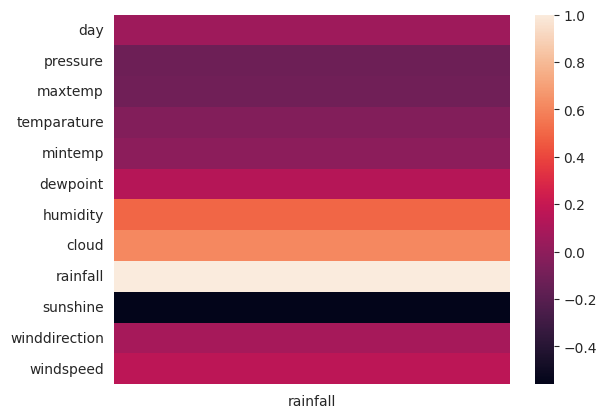

In [93]:
sns.heatmap(df_balanced.corr()[['rainfall']])

In [94]:
df_balanced=df_balanced.drop(columns=['day','winddirection','mintemp','maxtemp'])

In [95]:
df_balanced.columns

Index(['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'rainfall',
       'sunshine', 'windspeed'],
      dtype='object')

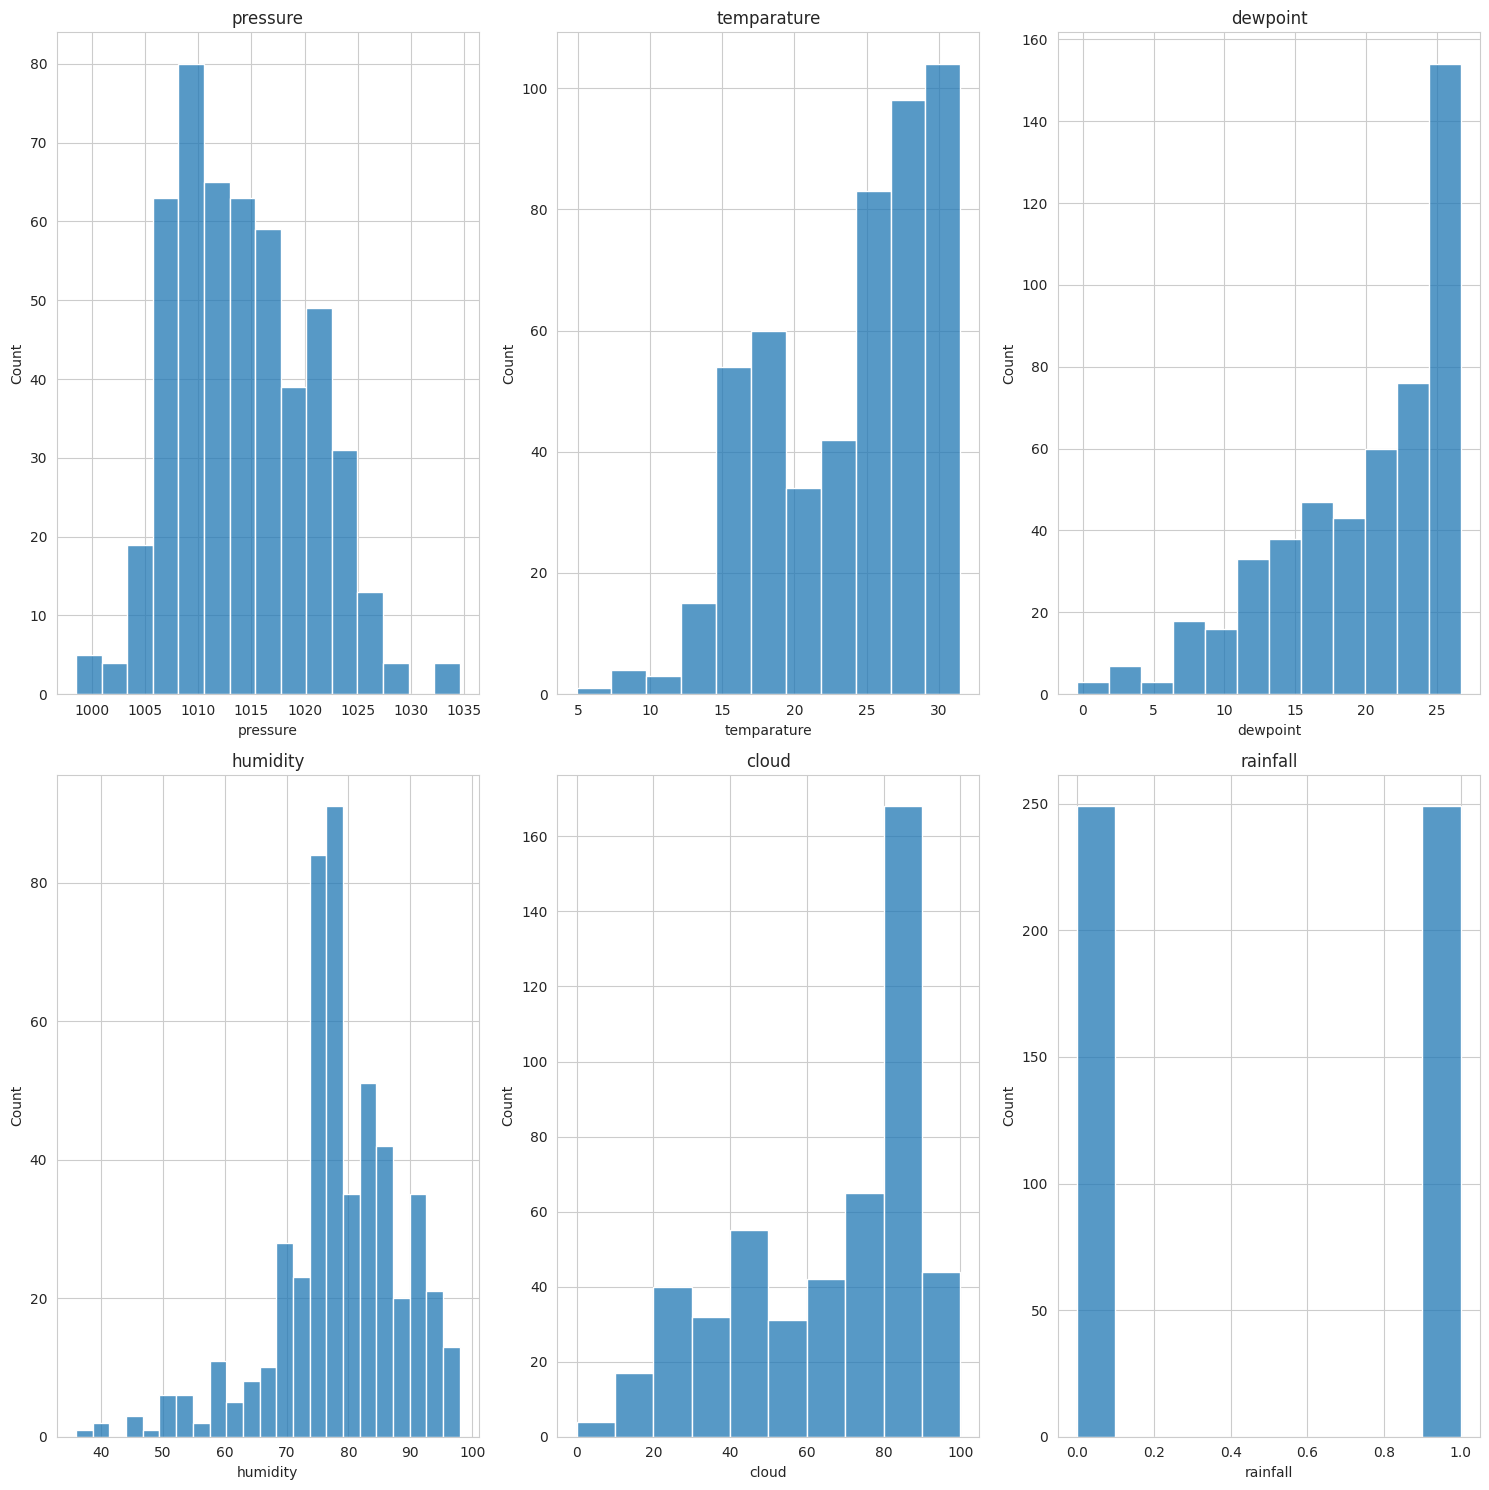

In [96]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,15))
axes = axes.flatten()
sns.set_style('whitegrid')
for col,ax in zip(df_balanced.columns,axes):
  sns.histplot(x=df_balanced[col],ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

In [112]:

X = df_balanced.drop(columns=['rainfall'])
Y = df_balanced['rainfall']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,pressure,temparature,dewpoint,humidity,cloud,sunshine,windspeed
0,1.875244,-0.993241,-1.105754,-0.641244,-0.700623,1.032015,0.532772
1,1.254266,-0.885677,-0.689592,0.247456,0.716864,-1.143275,-0.566056
2,0.888048,-0.813968,-0.223491,1.629878,1.050390,-1.293295,-0.675939
3,0.760668,-0.580912,-0.156905,1.136156,0.925318,-1.043262,-0.406227
4,0.282992,-0.562984,0.026207,1.629878,0.633482,-1.293295,-0.725886


In [114]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42,stratify=Y)
print(f"x_train.shape: {x_train.shape},x_test.shape: {x_test.shape},y_train.shape: {y_train.shape},y_test: {y_test.shape}")

x_train.shape: (398, 7),x_test.shape: (100, 7),y_train.shape: (398,),y_test: (100,)


In [115]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=10,
    callbacks=[callback],
    validation_data=(x_test, y_test),
    verbose=1
)



Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6933 - loss: 0.5861 - val_accuracy: 0.8100 - val_loss: 0.4439
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7647 - loss: 0.4250 - val_accuracy: 0.8000 - val_loss: 0.4270
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7904 - loss: 0.4027 - val_accuracy: 0.8100 - val_loss: 0.4253
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7772 - loss: 0.4063 - val_accuracy: 0.8100 - val_loss: 0.4208
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7726 - loss: 0.4621 - val_accuracy: 0.8100 - val_loss: 0.4203
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7780 - loss: 0.4088 - val_accuracy: 0.7800 - val_loss: 0.4146
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7779 - loss: 0.4090 - val_accuracy: 0.8200 - val_loss: 0.4122
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7862 - loss: 0.3973 - val_accuracy: 0.8000 - v

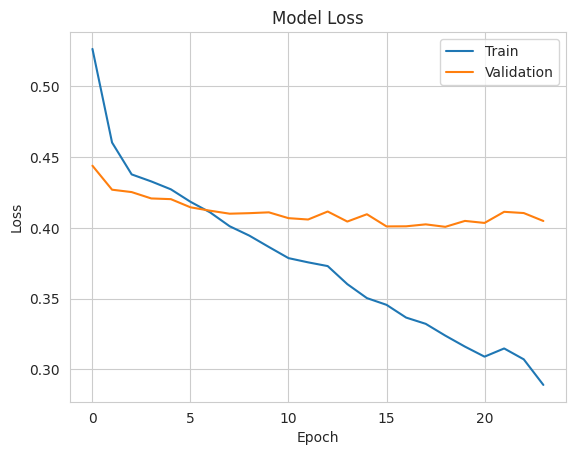

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

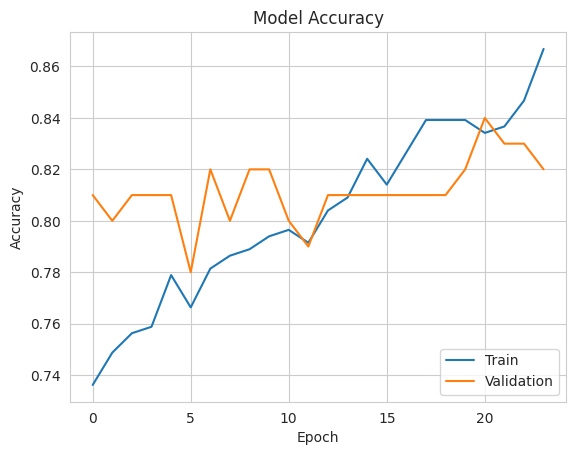

In [119]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [121]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,037 (109.52 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,692 (73.02 KB)